# Trabajo Parcial - Física

# 1. Movimiento de un paracaidista

## a. Parámetros

|               Parámetros                           |       Valores      |
|:----------------------------------------------------|:------------------:|
| Coeficiente de resistencia (C<sub>D</sub>)         |     1,17           |
| Densidad del aire (kg/m<sup>3</sup>)               |     1,20           | 
| Masa del paracaidista (kg)                         |     80, 0          | 
| Área transversal del paracaidista (m<sup>2</sup>)  |    [6,00; 10,0]    | 
| Rapidez inicial (m/s)                              |    [0,00; 5,00]    | 
| Tiempo en que abre el paracaídas (s)               |    [15,0; 23,0]    |
| Altura inicial (m)                                 |    [3 000; 3 500]   |

In [1]:
import matplotlib.pyplot as plt
import random

resistencia = 1.17
densidad_aire = 1.20
masa = 80.00
area = float(format(random.uniform(6, 10), '.2f'))
rapidez_i = float(format(random.uniform(0, 5), '.2f'))
tiempo_abre_paracaidas = float(format(random.uniform(15, 23), '.2f'))
altura_i = float(format(random.uniform(3000,3500), '.2f'))

gravedad = -9.81
k = (resistencia * densidad_aire * area) / 2

In [2]:
print("Resistencia: {0:.2f}".format(resistencia))
print("Densidad del aire: {0:.2f}".format(densidad_aire))
print("Masa del paracaidista: {0:.2f}".format(masa))
print("Area transversal paracaidista: ", area)
print("Rapidez inicial: ",rapidez_i)
print("Tiempo en que se abre el paracaidas: ", tiempo_abre_paracaidas)
print("Altura inicial: ", altura_i)
print("Gravedad: ", gravedad)
print("Constante 'k': {0:.2f}".format(k))

Resistencia: 1.17
Densidad del aire: 1.20
Masa del paracaidista: 80.00
Area transversal paracaidista:  9.26
Rapidez inicial:  1.21
Tiempo en que se abre el paracaidas:  17.61
Altura inicial:  3492.58
Gravedad:  -9.81
Constante 'k': 6.50


## b. Generación de datos (posición, velocidad y aceleración)

$$tap = tiempo\hspace{1mm}abre\hspace{1mm}paracaidas$$

$$tde = tiempo\hspace{1mm}de\hspace{1mm}equilibrio$$

### Posición

$$x_{(t)} =     \left \{ \begin{array}{rcl}
x_0 + v_0t + \frac{1}{2}at^2 & \mbox{,} & 0\leq t < tap \\ 
x_{(tap)}+ v_{(tap)}t + \frac{1}{2}a_{(t)}(t-tap)^2 & \mbox{,} & tap \leq t < tde \\
x_{(tde)} + v(t-tde) & \mbox{,} & tde \leq t < tiempo\hspace{1mm}final
\end{array}\right.$$

### Velocidad

$$v_{(t)} =     \left \{ \begin{array}{rcl}
v_0 + at & \mbox{,} & 0\leq t < tap \\ 
v_{(tap)} + a_{(t)}(t-tap) & \mbox{,} & tap \leq t < tde \\
\sqrt{\frac{m \mid g \mid}{k}} & \mbox{,} & tde \leq t \leq tiempo\hspace{1mm}final
\end{array}\right.$$

### Aceleración

$$a_{(t)} =     \left \{ \begin{array}{rcl}
g & \mbox{,} & 0\leq t < tap \\ 
{\displaystyle \frac{mg + kv_{(t)}^2}{m}}  & \mbox{,} & tap \leq t < tde \\
0 & \mbox{,} & tde \leq t \leq tiempo\hspace{1mm}final
\end{array}\right.$$

In [3]:
import math

posicion = []
velocidad = []
aceleracion = []
fuerza = []
tiempo = []

tap = tiempo_abre_paracaidas

t = 0
dt = 0.001
v = rapidez_i + gravedad * tap
a = (masa * gravedad + k * pow(v, 2)) / masa
f = masa * a
x = altura_i + (rapidez_i + v) * tap / 2

tiempo.append(t + tap)
velocidad.append(v)
aceleracion.append(a)
fuerza.append(f)
posicion.append(x)

while ( a > 0.00001):
    t = t + dt      
    v = v + a * dt
    a = (masa * gravedad + k * pow(v, 2)) / masa
    f = masa * a
    x = x + ((velocidad[-1] + v) * dt / 2)
    tiempo.append(t + tap)
    velocidad.append(v)
    aceleracion.append(a)
    fuerza.append(f)
    posicion.append(x)
    
tde = tap + t
x_tde = x
tf = tde + x_tde / v * -1
a = 0

def vel(t):
    if(t < tap):
        return rapidez_i + gravedad * t
    elif (t >= tde):
        return v
    
def acl(t):
    if(t < tap):
        return gravedad
    elif (t >= tde):
        return 0

def pos(t):
    if(t < tap):
        return altura_i + (rapidez_i + vel(t)) * t / 2
    elif (t >= tde):
        return x_tde + v * (t - tde)
    
def my_range(start, end, step):
    while start <= end:
        yield start
        start += step
        
def setPlot(a, b):
    width = a
    height = b
    plt.figure(figsize=(width, height))
    

## c. Gráficos

In [4]:
t_1 = [t for t in my_range(0, tf, 0.001)]
len(tiempo)

8423

In [5]:
tde - tap

8.422000000000772

### 1. Posición vs tiempo

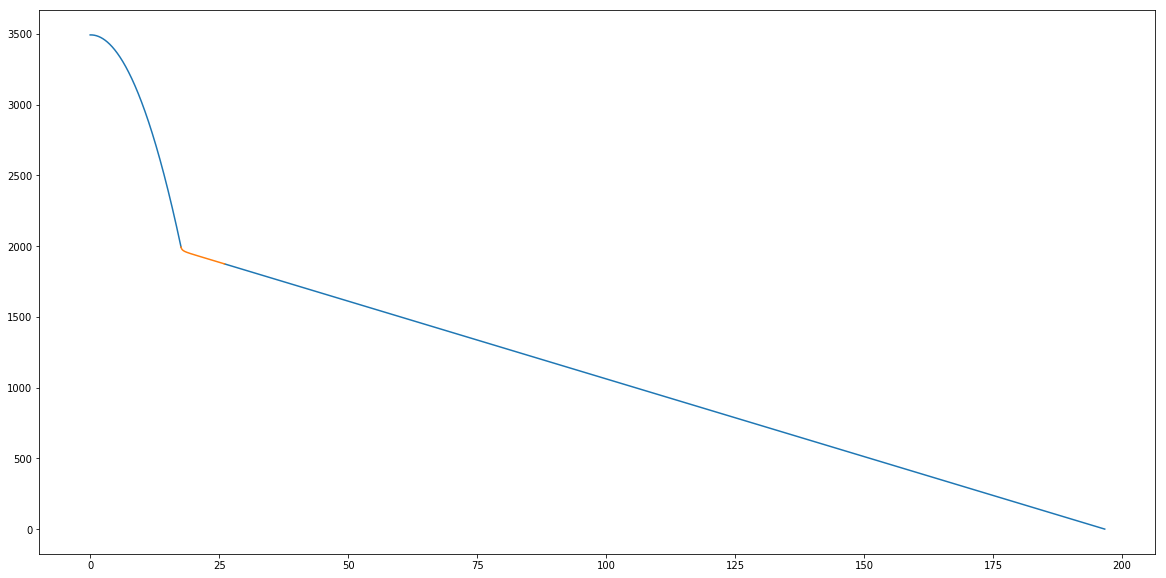

In [6]:
setPlot(20, 10)

p_1 = [pos(t) for t in my_range(0, tf, 0.001)]
plt.plot(t_1, p_1)
plt.plot(tiempo, posicion)
plt.show()

### 2. Velocidad vs tiempo

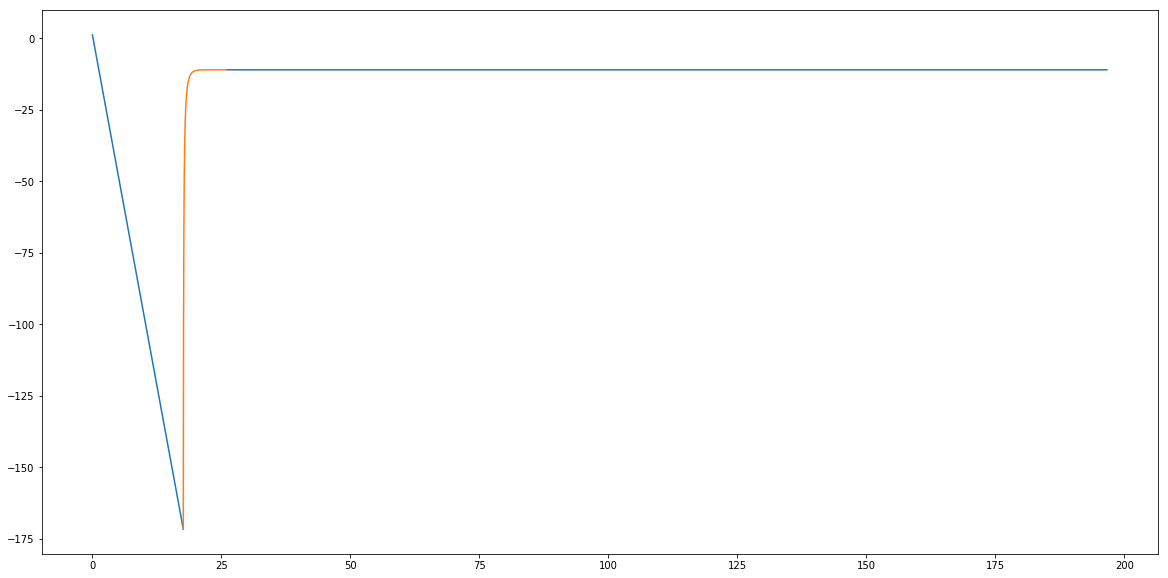

In [7]:
setPlot(20, 10)

v_1 = [vel(t) for t in my_range(0, tf, 0.001)]
plt.plot(t_1, v_1)
plt.plot(tiempo, velocidad)
plt.show()

### 3. Aceleración vs tiempo

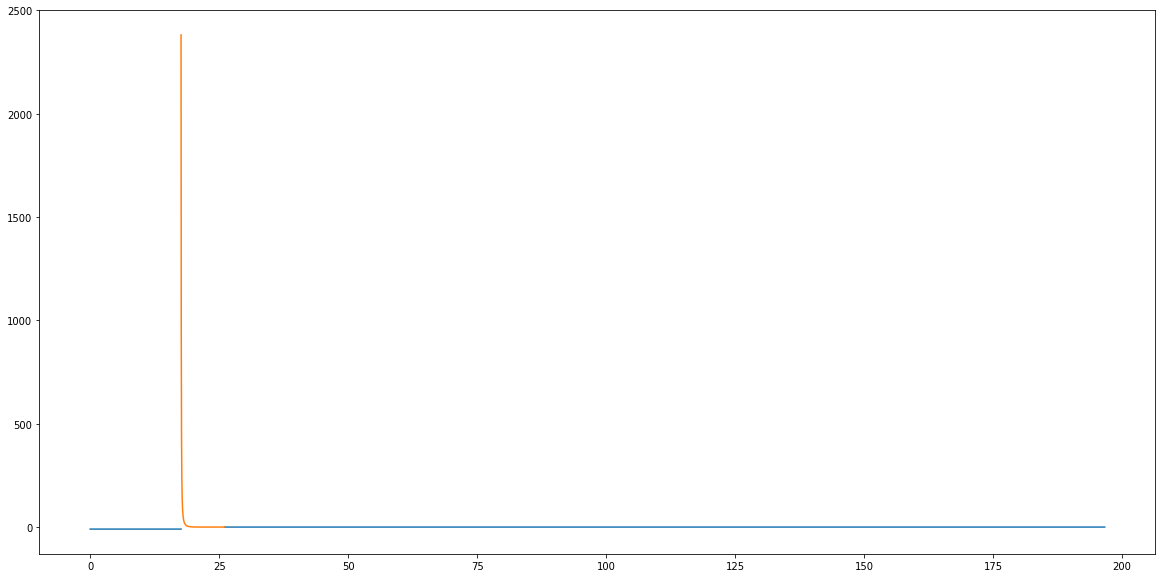

In [8]:
setPlot(20, 10)

a_1 = [acl(t) for t in my_range(0, tf, 0.001)]
plt.plot(t_1, a_1)
plt.plot(tiempo, aceleracion)
plt.show()

### 4. Fuerza de arrastre vs tiempo

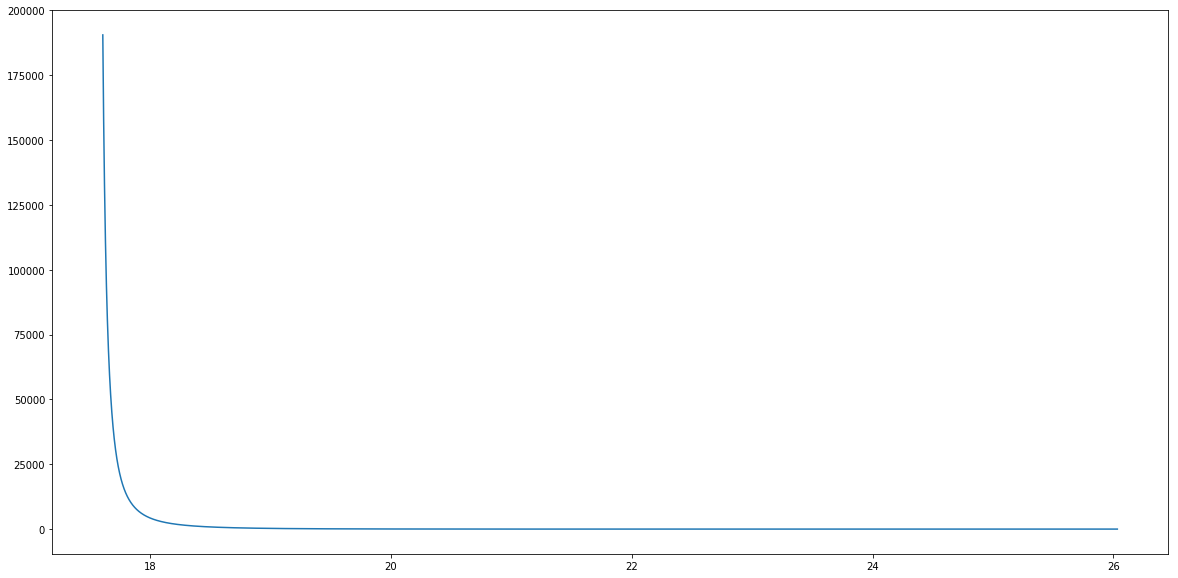

In [9]:
setPlot(20, 10)

plt.plot(tiempo, fuerza)
plt.show()

### 5. Comparativa de la velocidad, aceleración y posición durante la resolucion de las ecuaciones diferenciales

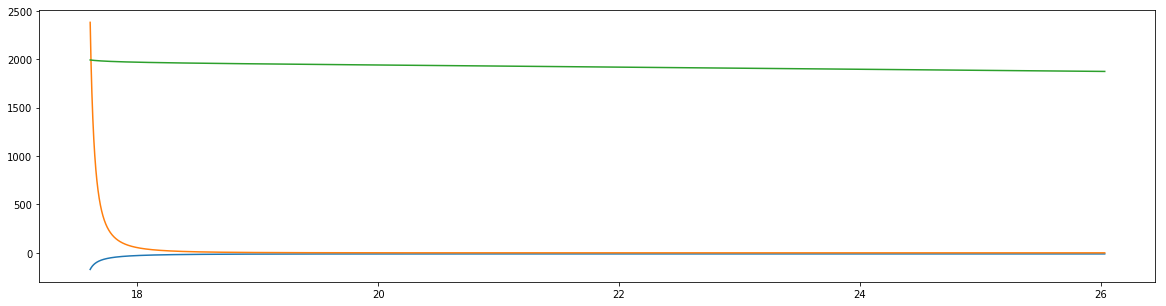

In [10]:
setPlot(20, 5)
plt.plot(tiempo, velocidad)
plt.plot(tiempo, aceleracion)
plt.plot(tiempo, posicion)
plt.show()

# 2. Movimiento de un proyectil

## a. Parámetros

|               Parámetros                           |       Valores      |
|:---------------------------------------------------|:------------------:|
| Posición inicial de lanzamiento (m)                |    [0,00; 0,00]    |       |
| Rapidez inicial (m/s)                              |     50,0           | 
| Radio (cm)                                         |     3,66           | 
| Coeficiente de resistencia (C<sub>D</sub>)         |     0,500          |
| Masa(kg)                                           |     0,145          |
| Ángulo de lanzamiento                              |    [20,0°; 70,0°]  |
| Densidad del aire (kg/m<sup>3</sup>)               |     1,20           | 

In [11]:
posicion_i_x = 0.0
posicion_i_y = 0.0
rapidez_i = 50.0
radio = 0.0366
resistencia = 0.50
masa = 0.145
angulo_i = float(format(random.uniform(20, 70), '.2f'))
densidad_aire = 1.20

gravedad = -9.81
area = math.pi * pow(radio, 2)
k = (resistencia * densidad_aire * area) / 2

In [12]:
print("Posición en x: {0:.2f}".format(posicion_i_x))
print("Posición en y: {0:.2f}".format(posicion_i_y))
print("Rapidez inicial: {0:.2f}".format(rapidez_i))
print("Coeficiente de resistencia: {0:.2f}".format(resistencia))
print("Masa: {0:.2f}".format(masa))
print("Ángulo inicial: ", angulo_i, "°")
print("Densidad del aire: {0:.2f}".format(densidad_aire))

print("Gravedad: ", gravedad)
print("Área: ", area)
print("Constante 'k': {0:.2f}".format(k))

Posición en x: 0.00
Posición en y: 0.00
Rapidez inicial: 50.00
Coeficiente de resistencia: 0.50
Masa: 0.14
Ángulo inicial:  69.78 °
Densidad del aire: 1.20
Gravedad:  -9.81
Área:  0.004208351855042743
Constante 'k': 0.00


## b. Generación de datos (posición, velocidad y aceleración)

In [21]:
posicion_x = []
posicion_y = []
velocidad = []
velocidad_x = []
velocidad_y = []
aceleracion_x = []
aceleracion_y = []
fuerza_x = []
fuerza_y = []
tiempo = []

t = 0
dt = 0.0001
theta = angulo_i * math.pi / 180
v = rapidez_i
v_x = v * math.cos(theta)
v_y = v * math.sin(theta)
a_x = 0
a_y = gravedad
f_x = masa * a_x
f_y = masa * a_y
pos_x = 0
pos_y = 0

#v = math.sqrt(v_x * v_x + v_y * v_y)
posicion_x.append(pos_x)
posicion_y.append(pos_y)
velocidad.append(v)
velocidad_x.append(v_x)
velocidad_y.append(v_y)
aceleracion_x.append(a_x)
aceleracion_y.append(a_y)
fuerza_x.append(f_x)
fuerza_y.append(f_y)
tiempo.append(t)

while ( pos_y >= 0):
    t = t + dt
    f_x = -k * v * v_x
    f_y = -k * v * v_y
    a_x = f_x / masa
    a_y = (masa * gravedad + f_y) / masa
    v_x = v_x + a_x * dt
    v_y = v_y + a_y * dt
    pos_x = pos_x + ((velocidad_x[-1] + v_x) * dt / 2)
    pos_y = pos_y + ((velocidad_y[-1] + v_y) * dt / 2)
    v = math.sqrt(v_x * v_x + v_y * v_y)
    posicion_x.append(pos_x)
    posicion_y.append(pos_y)
    velocidad.append(v)
    velocidad_x.append(v_x)
    velocidad_y.append(v_y)
    aceleracion_x.append(a_x)
    aceleracion_y.append(a_y)
    fuerza_x.append(f_x)
    fuerza_y.append(f_y)
    tiempo.append(t)

In [22]:
len(posicion_y)

69811

## c. Gráficos

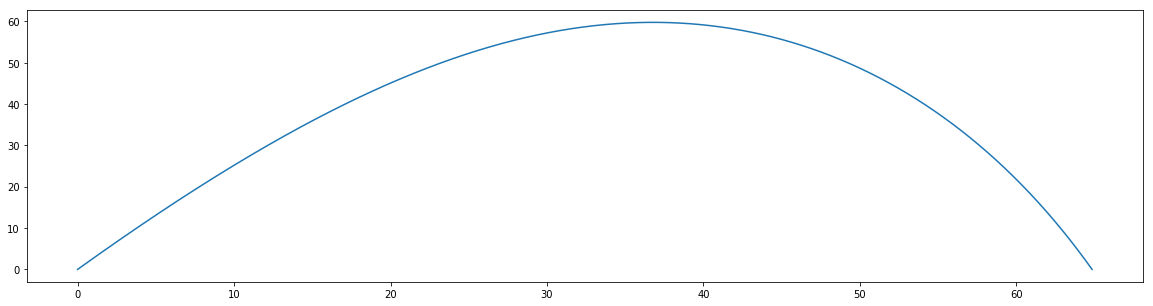

In [23]:
setPlot(20, 5)
plt.plot(posicion_x, posicion_y)
plt.show()

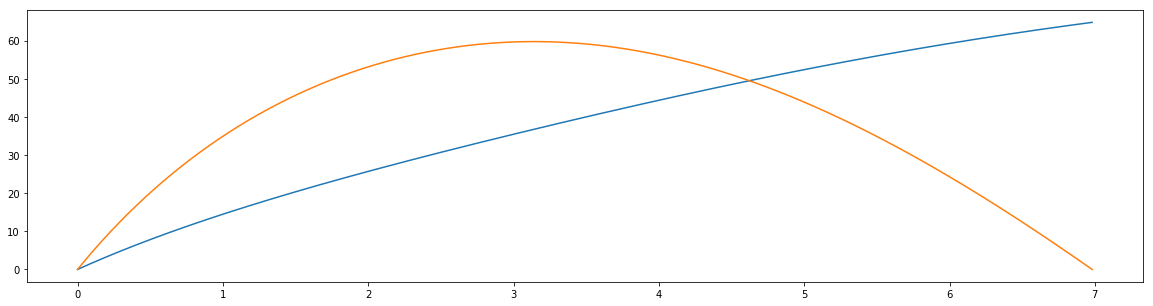

In [24]:
setPlot(20, 5)
plt.plot(tiempo, posicion_x)
plt.plot(tiempo, posicion_y)
plt.show()

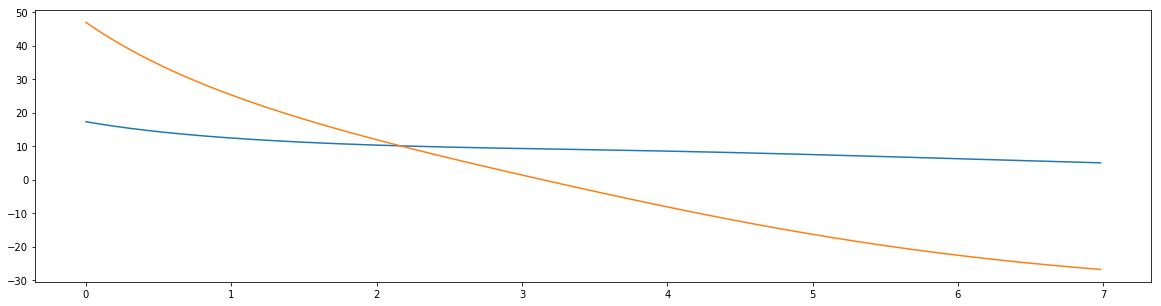

In [25]:
setPlot(20, 5)
plt.plot(tiempo, velocidad_x)
plt.plot(tiempo, velocidad_y)
plt.show()

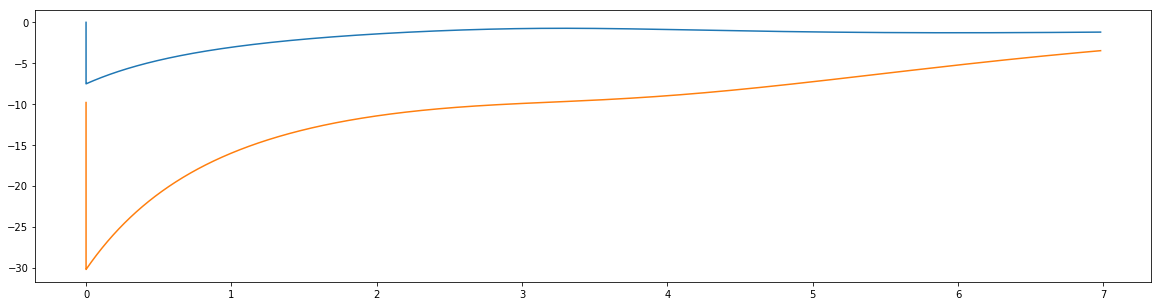

In [26]:
setPlot(20, 5)
plt.plot(tiempo, aceleracion_x)
plt.plot(tiempo, aceleracion_y)
plt.show()